# Electricity Demand and Price Forecasting

# EXPLORATORY DATA ANALYSIS(EDA)

In [91]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# LOADING THE DATASET

In [92]:
file_path = r"C:\Users\chint\OneDrive\Desktop\Electricity Demand and Price Forecasting\complete_dataset.csv"
df = pd.read_csv(file_path)

In [93]:
df.head()

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,01-01-2015,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,02-01-2015,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809776,0.062500,15.4,38.8,26.8,0.0,N,N
2,03-01-2015,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,04-01-2015,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,05-01-2015,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N


In [94]:
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             2106 non-null   object 
 1   demand           2106 non-null   float64
 2   RRP              2106 non-null   float64
 3   demand_pos_RRP   2106 non-null   float64
 4   RRP_positive     2106 non-null   float64
 5   demand_neg_RRP   2106 non-null   float64
 6   RRP_negative     2106 non-null   float64
 7   frac_at_neg_RRP  2106 non-null   float64
 8   min_temperature  2106 non-null   float64
 9   max_temperature  2106 non-null   float64
 10  solar_exposure   2105 non-null   float64
 11  rainfall         2103 non-null   float64
 12  school_day       2106 non-null   object 
 13  holiday          2106 non-null   object 
dtypes: float64(11), object(3)
memory usage: 230.5+ KB
None


In [95]:
df.describe()

,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall
count,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2105.000000,2103.000000
mean,120035.476503,76.079554,119252.305055,76.553847,783.171448,-2.686052,0.008547,11.582289,20.413200,14.743373,1.505944
std,13747.993761,130.246805,14818.631319,130.114184,3578.920686,19.485432,0.039963,4.313711,6.288693,7.945527,4.307897
min,85094.375000,-6.076028,41988.240000,13.568986,0.000000,-342.220000,0.000000,0.600000,9.000000,0.700000,0.000000
25%,109963.650000,38.707040,109246.250000,39.117361,0.000000,0.000000,0.000000,8.500000,15.525000,8.200000,0.000000
50%,119585.912500,66.596738,119148.082500,66.869058,0.000000,0.000000,0.000000,11.300000,19.100000,12.700000,0.000000
75%,130436.006250,95.075012,130119.477500,95.130181,0.000000,0.000000,0.000000,14.600000,23.900000,20.700000,0.800000
max,170653.840000,4549.645105,170653.840000,4549.645105,57597.595000,0.000000,0.625000,28.000000,43.500000,33.300000,54.600000


# Demand vs Weather Variables
The below pairplot visualizes the relationships between electricity demand and key weather variables (min_temperature, max_temperature, solar_exposure, and rainfall).

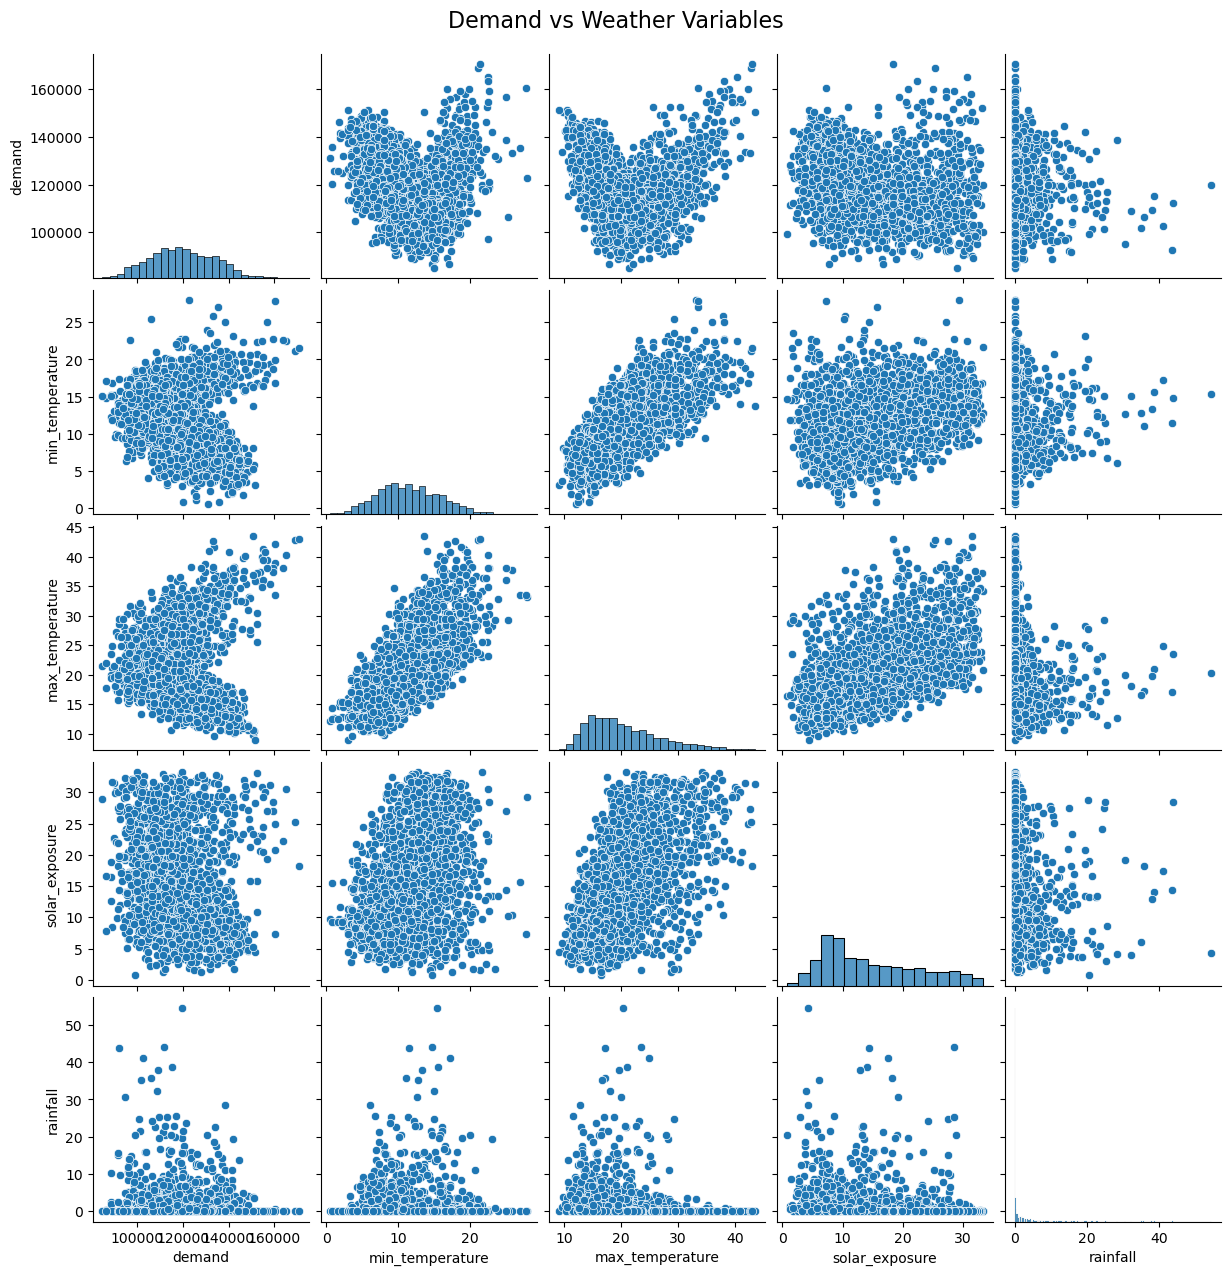

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"C:\Users\chint\OneDrive\Desktop\Electricity Demand and Price Forecasting\complete_dataset.csv")

# Define weather-related variables
weather_vars = ['min_temperature', 'max_temperature', 'solar_exposure', 'rainfall']

# Pairplot for visualizing relationships between demand and weather variables
sns.pairplot(df[['demand'] + weather_vars])
plt.suptitle('Demand vs Weather Variables', fontsize=16, y=1.02)  # Adjust y for proper title positioning
plt.show()


# CHECKING FOR NULL VALUES

In [43]:

missing_summary = data.isnull().sum().reset_index()
missing_summary.columns = ['Feature', 'Missing_Values']
missing_summary['%_Missing'] = (missing_summary['Missing_Values'] / len(data)) * 100
print(missing_summary)


            Feature  Missing_Values  %_Missing
0            demand               0   0.000000
1               RRP               0   0.000000
2    demand_pos_RRP               0   0.000000
3      RRP_positive               0   0.000000
4    demand_neg_RRP               0   0.000000
5      RRP_negative               0   0.000000
6   frac_at_neg_RRP               0   0.000000
7   min_temperature               0   0.000000
8   max_temperature               0   0.000000
9    solar_exposure               0   0.000000
10         rainfall               3   0.359712
11       school_day               0   0.000000
12          holiday               0   0.000000
13           season               0   0.000000


In [44]:
data.fillna({'solar_exposure': data['solar_exposure'].median(),
             'rainfall': data['rainfall'].median()}, inplace=True)

In [98]:
print(data.isnull().sum())

demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     0
rainfall           0
school_day         0
holiday            0
season             0
day_of_week        0
hour               0
hour_sin           0
hour_cos           0
day_sin            0
day_cos            0
cos_sin            0
dtype: int64


In [99]:
df.duplicated().sum()

0

# Filling null Values

In [100]:
data = data.assign(
    solar_exposure=data['solar_exposure'].fillna(data['solar_exposure'].median()),
    rainfall=data['rainfall'].fillna(data['rainfall'].median())
)

In [101]:
print(data[['solar_exposure', 'rainfall']].isnull().sum())

solar_exposure    0
rainfall          0
dtype: int64


# Anomaly Detection and Outlier Analysis
• Identify demand outliers and investigate potential causes (external events, data
errors, or operational issues).
• Develop strategies to handle anomalies for accurate forecasting.

In [102]:
print(df.columns.tolist())

['date', 'demand', 'RRP', 'demand_pos_RRP', 'RRP_positive', 'demand_neg_RRP', 'RRP_negative', 'frac_at_neg_RRP', 'min_temperature', 'max_temperature', 'solar_exposure', 'rainfall', 'school_day', 'holiday']


In [104]:
from scipy import stats
import numpy as np
z_scores = np.abs(stats.zscore(df['demand']))
outliers_z = df[z_scores > 2.5]
print(f"Number of outliers detected (Z-score > 2.5): {len(outliers_z)}")
print(outliers_z.head())

Number of outliers detected (Z-score > 2.5): 19
           date      demand         RRP  demand_pos_RRP  RRP_positive  \
351  18-12-2015  158052.890   81.192486      158052.890     81.192486   
352  19-12-2015  154924.890   69.328821      154924.890     69.328821   
377  13-01-2016  160011.075  545.737820      160011.075    545.737820   
418  23-02-2016  156924.830   66.960656      156924.830     66.960656   
432  08-03-2016  160285.015  253.032032      160285.015    253.032032   

     demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
351             0.0           0.0              0.0             19.4   
352             0.0           0.0              0.0             19.2   
377             0.0           0.0              0.0             16.8   
418             0.0           0.0              0.0             18.1   
432             0.0           0.0              0.0             19.9   

     max_temperature  solar_exposure  rainfall school_day holiday  
351             35

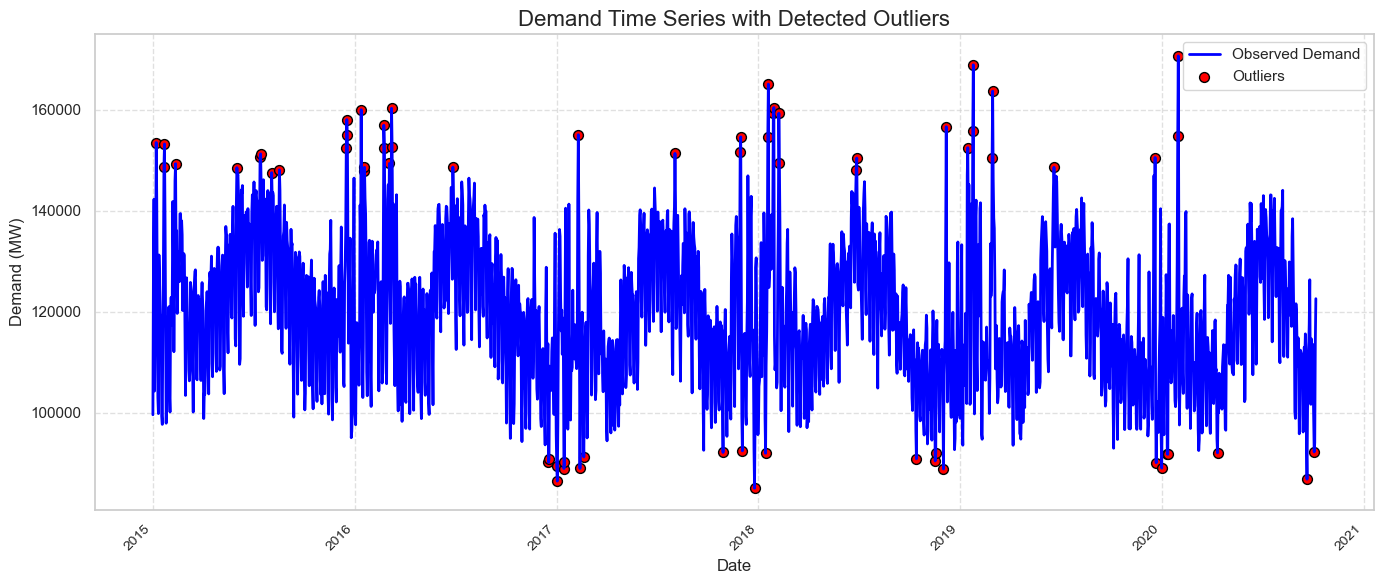

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
df['z_score'] = zscore(df['demand'])
outliers_z = df[abs(df['z_score']) > 2]  
plt.figure(figsize=(14, 6))
plt.plot(df['date'], df['demand'], label='Observed Demand', color='blue', linewidth=2)
plt.scatter(outliers_z['date'], outliers_z['demand'], color='red', label='Outliers', s=50, edgecolors='black')
plt.grid(True, linestyle='--', alpha=0.6)
plt.title('Demand Time Series with Detected Outliers', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Demand (MW)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()



# Encoding school_day and holiday (categorical values) into 0 and 1

In [106]:
data['school_day'] = data['school_day'].map({'Yes': 1, 'No': 0})
data['holiday'] = data['holiday'].map({'Yes': 1, 'No': 0})


In [107]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['school_day'] = le.fit_transform(data['school_day'])
data['holiday'] = le.fit_transform(data['holiday'])


In [41]:
print(data[['school_day', 'holiday']].head())


           school_day holiday
date                         
2015-01-01          N       Y
2015-02-01          N       N
2015-03-01          N       N
2015-04-01          N       N
2015-05-01          N       N


In [40]:
print(data['school_day'].unique())
print(data['holiday'].unique())


['N' 'Y']
['Y' 'N']


In [111]:
print(data.columns)



Index(['demand', 'RRP', 'demand_pos_RRP', 'RRP_positive', 'demand_neg_RRP',
       'RRP_negative', 'frac_at_neg_RRP', 'min_temperature', 'max_temperature',
       'solar_exposure', 'rainfall', 'school_day', 'holiday', 'season',
       'day_of_week', 'hour', 'hour_sin', 'hour_cos', 'day_sin', 'day_cos',
       'cos_sin'],
      dtype='object')


# Electricity Demand Distribution (After Outlier Capping at 3 Std Dev)
 # Insight from the Plot:
The histogram displays the distribution of electricity demand after applying outlier capping at 3 standard deviations, which limits the impact of extreme values and ensures a more robust analysis.
The kernel density estimate (KDE) curve shows the probability density, helping identify the skewness and central tendency of demand values.
The majority of demand values cluster around the mean, with a smoother tail after capping, indicating a reduction in extreme fluctuations.
# Why This Analysis Matters:
Outlier treatment improves the performance of forecasting models by reducing the influence of rare, extreme demand values that could skew predictions.
Understanding the distribution helps in selecting appropriate modeling techniques (e.g., LSTM, Transformer models) and informs scaling or normalization strategies.
A balanced distribution after outlier capping ensures stable training and better generalization of deep learning models.

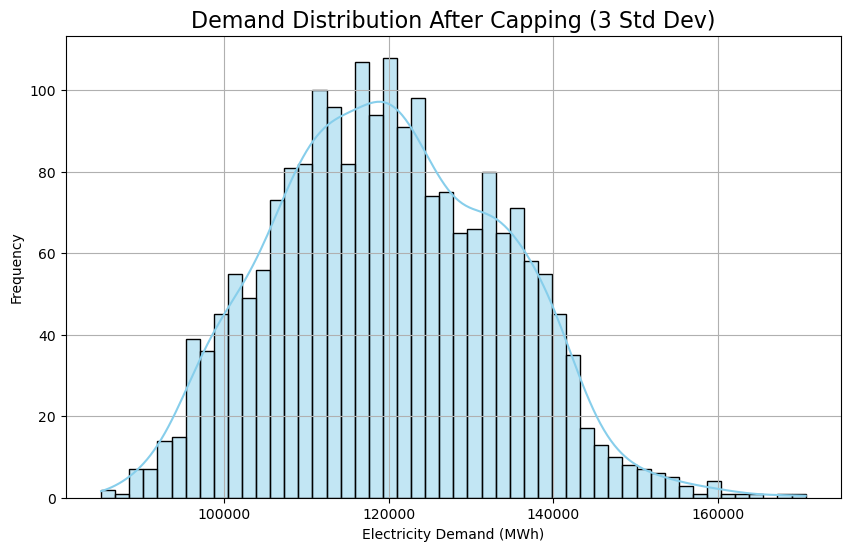

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data_cleaned = pd.read_csv(r'C:\Users\chint\OneDrive\Desktop\Electricity Demand and Price Forecasting\complete_dataset.csv')
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['demand'], bins=50, kde=True, color='skyblue')
plt.title('Demand Distribution After Capping (3 Std Dev)', fontsize=16)
plt.xlabel('Electricity Demand (MWh)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [57]:
print(data_cleaned.columns)


Index(['date', 'demand', 'RRP', 'demand_pos_RRP', 'RRP_positive',
       'demand_neg_RRP', 'RRP_negative', 'frac_at_neg_RRP', 'min_temperature',
       'max_temperature', 'solar_exposure', 'rainfall', 'school_day',
       'holiday'],
      dtype='object')


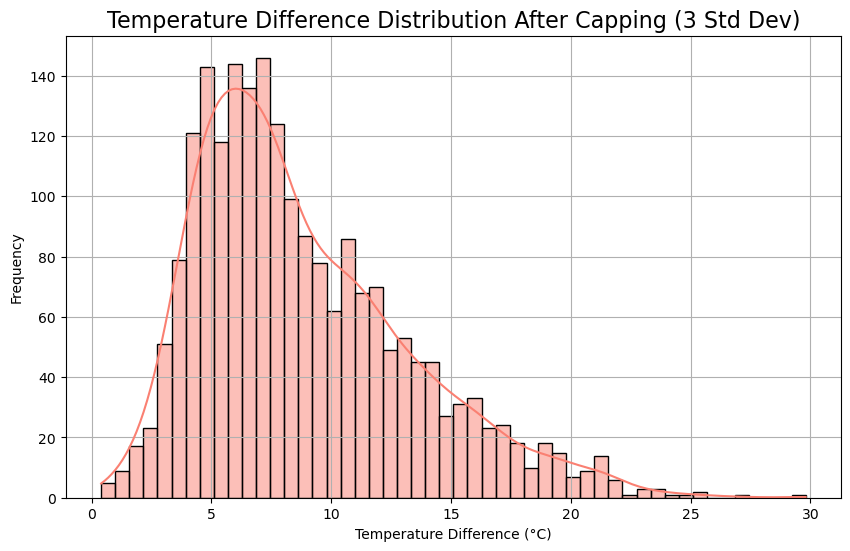

In [58]:

data_cleaned['temperature_diff'] = data_cleaned['max_temperature'] - data_cleaned['min_temperature']


plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['temperature_diff'], bins=50, kde=True, color='salmon')
plt.title('Temperature Difference Distribution After Capping (3 Std Dev)', fontsize=16)
plt.xlabel('Temperature Difference (°C)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


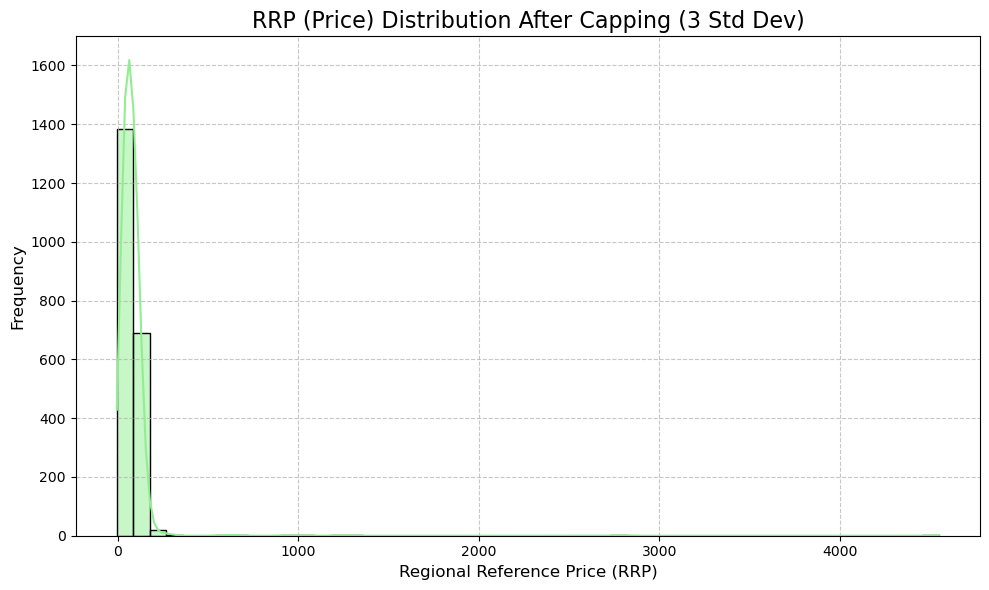

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=data_cleaned, x='RRP', bins=50, kde=True, color='lightgreen')
plt.title('RRP (Price) Distribution After Capping (3 Std Dev)', fontsize=16)
plt.xlabel('Regional Reference Price (RRP)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



 # Demand-Price Elasticity Analysis, essential for understanding how electricity demand responds to price fluctuations.

# Elasticity Calculation (Point Elasticity Method)
We'll compute the price elasticity of demand (PED) using the formula:

PED =%Change in Demand/%Change in Price

PED= %Change in Price/%Change in Demand

 


In [62]:
import pandas as pd
file_path = r"C:\Users\chint\OneDrive\Desktop\Electricity Demand and Price Forecasting\complete_dataset.csv"
df = pd.read_csv(file_path)
print(df.head())
print(df.columns)


         date      demand        RRP  demand_pos_RRP  RRP_positive  \
0  01-01-2015   99635.030  25.633696       97319.240     26.415953   
1  02-01-2015  129606.010  33.138988      121082.015     38.837661   
2  03-01-2015  142300.540  34.564855      142300.540     34.564855   
3  04-01-2015  104330.715  25.005560      104330.715     25.005560   
4  05-01-2015  118132.200  26.724176      118132.200     26.724176   

   demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
0        2315.790     -7.240000         0.020833             13.3   
1        8523.995    -47.809776         0.062500             15.4   
2           0.000      0.000000         0.000000             20.0   
3           0.000      0.000000         0.000000             16.3   
4           0.000      0.000000         0.000000             15.0   

   max_temperature  solar_exposure  rainfall school_day holiday  
0             26.9            23.6       0.0          N       Y  
1             38.8            26

In [63]:
import numpy as np
df['demand_pct_change'] = df['demand'].pct_change()
df['price_pct_change'] = df['RRP'].pct_change()
df['price_elasticity'] = df['demand_pct_change'] / df['price_pct_change']
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=['price_elasticity'], inplace=True)
print(df[['date', 'demand', 'RRP', 'price_elasticity']].head())


         date      demand        RRP  price_elasticity
1  02-01-2015  129606.010  33.138988          1.027383
2  03-01-2015  142300.540  34.564855          2.276416
3  04-01-2015  104330.715  25.005560          0.964808
4  05-01-2015  118132.200  26.724176          1.924737
5  06-01-2015  130672.485  31.282311          0.622381


# Price Elasticity Analysis & Revenue Optimization Strategies
 Key Insights from Elasticity Trends:
# Elastic Demand Periods (Elasticity > 1):

Consumers respond significantly to price changes.
Strategy: Implement time-of-use pricing—lower prices during these periods to boost demand and revenue.
# Inelastic Demand Periods (Elasticity < 1):

Demand remains stable despite price changes.
Strategy: Introduce premium pricing or fixed tariffs during these times to maximize profit.
# Near-Unit Elasticity (Elasticity ≈ 1):

Demand and price are proportionally related.
Strategy: Dynamic pricing models can be effective, leveraging real-time demand forecasts.


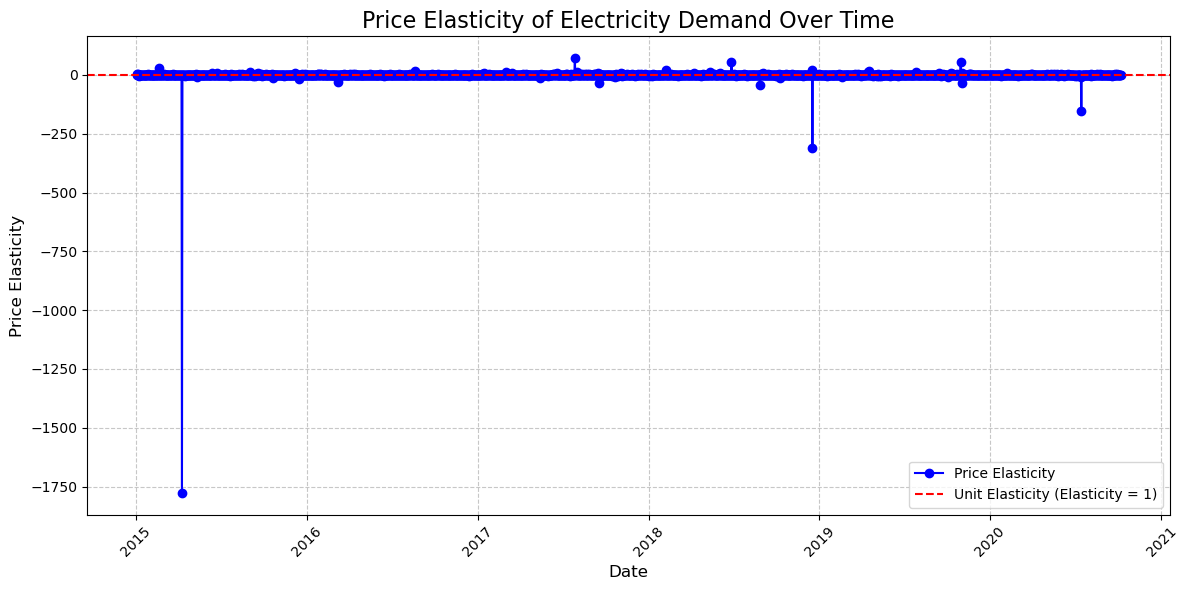

In [64]:
import matplotlib.pyplot as plt
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['price_elasticity'], marker='o', linestyle='-', color='blue', label='Price Elasticity')
plt.axhline(1, color='red', linestyle='--', label='Unit Elasticity (Elasticity = 1)')
plt.title('Price Elasticity of Electricity Demand Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price Elasticity', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# YEAR AND MONTH ANALYSIS (Electricity Demand Over Time)

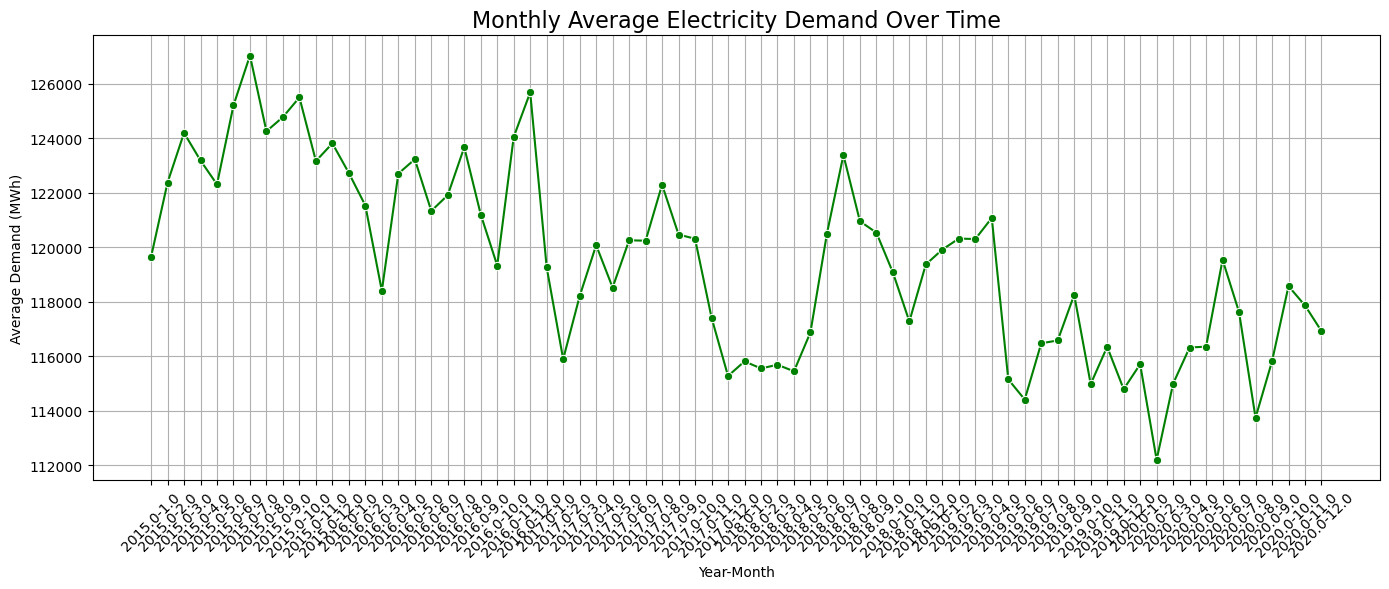

In [6]:

data = pd.read_csv(r"C:\Users\chint\OneDrive\Desktop\Electricity Demand and Price Forecasting\complete_dataset.csv")
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
monthly_demand = data.groupby(['year', 'month'])['demand'].mean().reset_index()
monthly_demand['year_month'] = monthly_demand['year'].astype(str) + '-' + monthly_demand['month'].astype(str).str.zfill(2)
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_demand, x='year_month', y='demand', marker='o', color='green')
plt.xticks(rotation=45)
plt.title('Monthly Average Electricity Demand Over Time', fontsize=16)
plt.xlabel('Year-Month')
plt.ylabel('Average Demand (MWh)')
plt.grid(True)
plt.tight_layout()
plt.show()


# Electricity Demand, Price & Weather Factors
This heatmap illustrates the correlation coefficients between various numerical features in the dataset, including electricity demand, RRP (price), and weather variables.

Key Insights:
Positive Correlation (+1): Variables move in the same direction.
Negative Correlation (-1): Variables move in opposite directions.
Zero Correlation (0): No linear relationship.
The heatmap helps in identifying strong relationships useful for feature selection and forecasting model development.

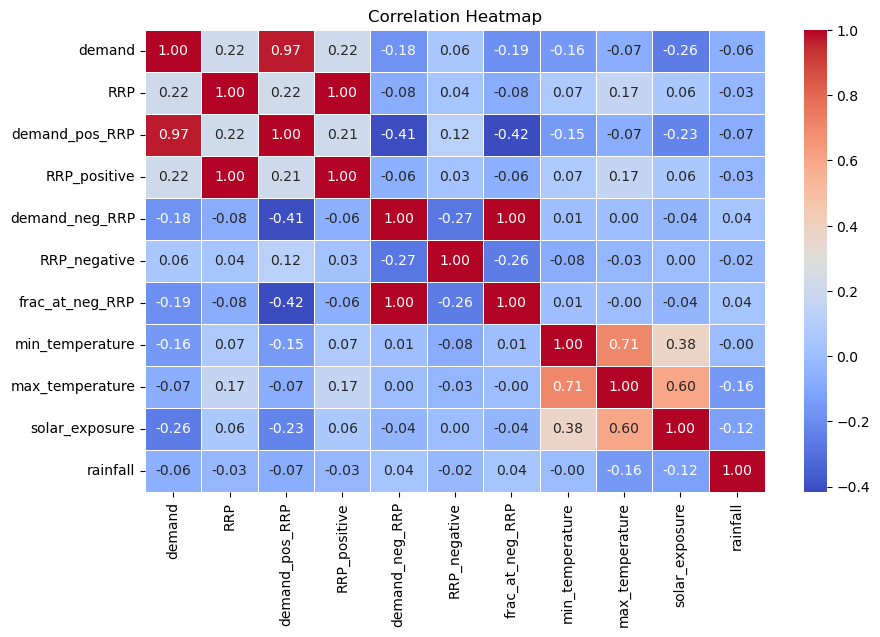

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\chint\OneDrive\Desktop\Electricity Demand and Price Forecasting\complete_dataset.csv")
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Demand vs. Electricity Price (RRP)

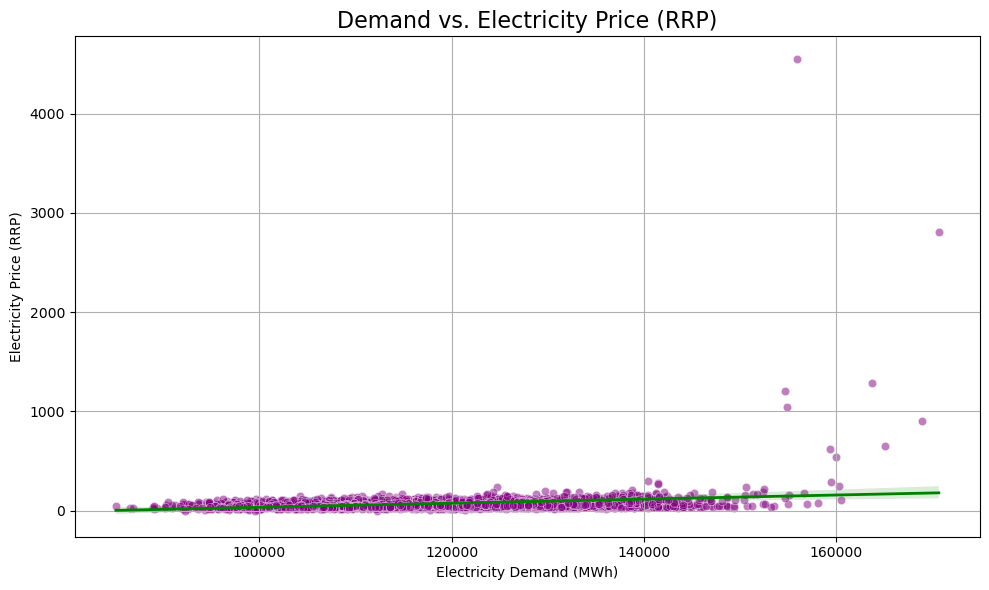

Correlation between Electricity Demand and Price (RRP): 0.218


In [7]:

data = pd.read_csv(r"C:\Users\chint\OneDrive\Desktop\Electricity Demand and Price Forecasting\complete_dataset.csv")
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data = data.dropna(subset=['RRP', 'demand'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='demand', y='RRP', data=data, alpha=0.5, color='Purple')
sns.regplot(x='demand', y='RRP', data=data, scatter=False, color='Green', line_kws={'linewidth': 2})
plt.title('Demand vs. Electricity Price (RRP)', fontsize=16)
plt.xlabel('Electricity Demand (MWh)')
plt.ylabel('Electricity Price (RRP)')
plt.grid(True)
plt.tight_layout()
plt.show()
correlation = data[['demand', 'RRP']].corr().iloc[0, 1]
print(f"Correlation between Electricity Demand and Price (RRP): {correlation:.3f}")


# 'Demand vs Weather Variables'

In [38]:
print(data.columns)

Index(['date', 'demand', 'RRP', 'demand_pos_RRP', 'RRP_positive',
       'demand_neg_RRP', 'RRP_negative', 'frac_at_neg_RRP', 'min_temperature',
       'max_temperature', 'solar_exposure', 'rainfall', 'school_day',
       'holiday'],
      dtype='object')


In [86]:
# Correlation between demand and weather variables
weather_vars = ['min_temperature', 'max_temperature', 'solar_exposure', 'rainfall']

# Drop rows with missing values for accurate correlation
weather_data = data.dropna(subset=['demand'] + weather_vars)

# Calculate correlation matrix
correlation_matrix = weather_data[['demand'] + weather_vars].corr()

# Display correlation matrix
print(correlation_matrix)

                   demand  min_temperature  max_temperature  solar_exposure  \
demand           1.000000        -0.154689        -0.072301       -0.256966   
min_temperature -0.154689         1.000000         0.705385        0.376771   
max_temperature -0.072301         0.705385         1.000000        0.599127   
solar_exposure  -0.256966         0.376771         0.599127        1.000000   
rainfall        -0.064450        -0.003432        -0.155719       -0.123568   

                 rainfall  
demand          -0.064450  
min_temperature -0.003432  
max_temperature -0.155719  
solar_exposure  -0.123568  
rainfall         1.000000  


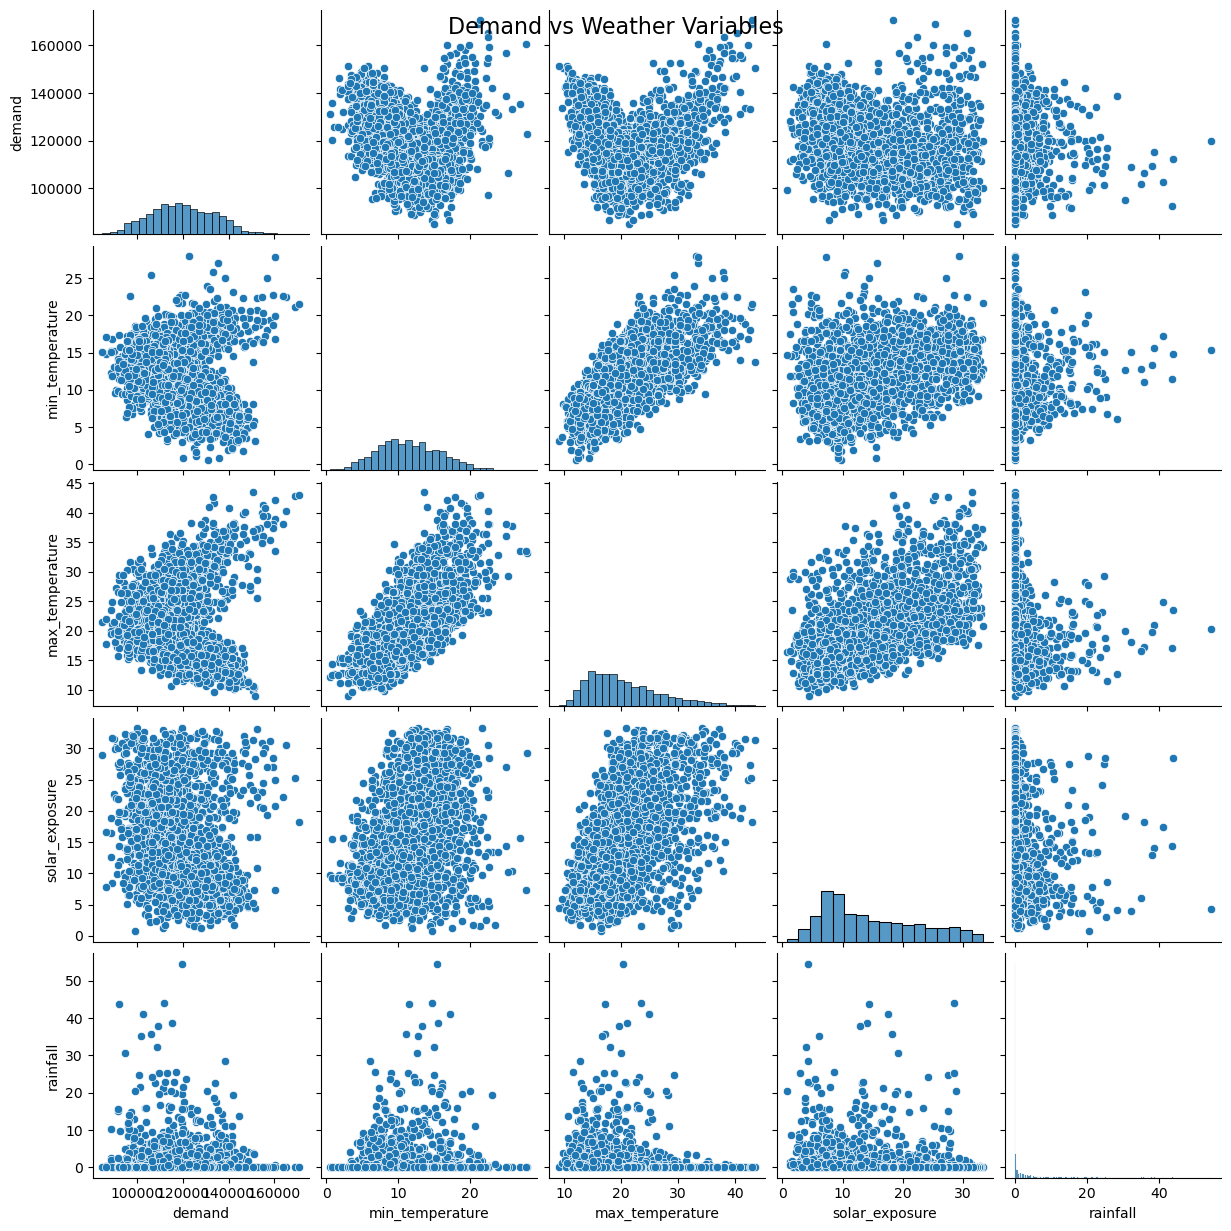

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
# Pairplot for visualizing relationships
sns.pairplot(weather_data[['demand'] + weather_vars])
plt.suptitle('Demand vs Weather Variables', fontsize=16)
plt.show()

# Electricity Demand vs. Maximum Temperature
This scatter plot visualizes the relationship between maximum temperature and electricity demand:

X-axis: Max Temperature (°C)
Y-axis: Electricity Demand (MWh)
Observations:
Demand may increase during extreme temperatures (very hot or cold days), indicating higher usage due to cooling or heating systems.
The alpha=0.5 transparency setting helps visualize dense data points more clearly.

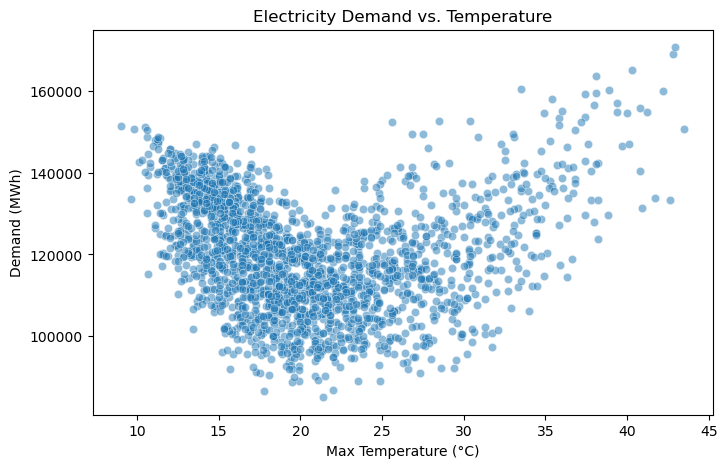

In [8]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["max_temperature"], y=df["demand"], alpha=0.5)
plt.title("Electricity Demand vs. Temperature")
plt.xlabel("Max Temperature (°C)")
plt.ylabel("Demand (MWh)")
plt.show()

# Electricity Demand School Days vs Holidays

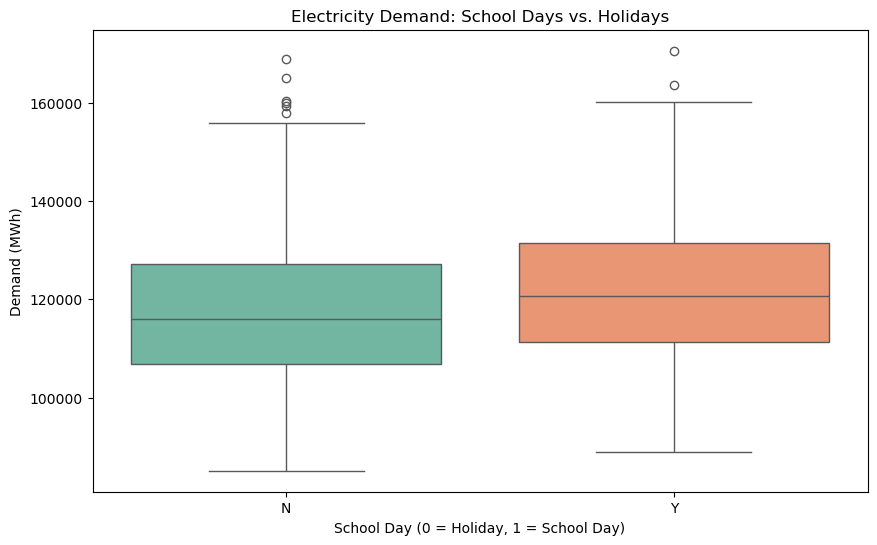

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="school_day", y="demand", hue="school_day", data=df, palette="Set2", legend=False)
plt.title("Electricity Demand: School Days vs. Holidays")
plt.xlabel("School Day (0 = Holiday, 1 = School Day)")
plt.ylabel("Demand (MWh)")
plt.show()


 # Understanding Electricity Demand patterns during periods of low or negative Regional Reference Price (RRP).

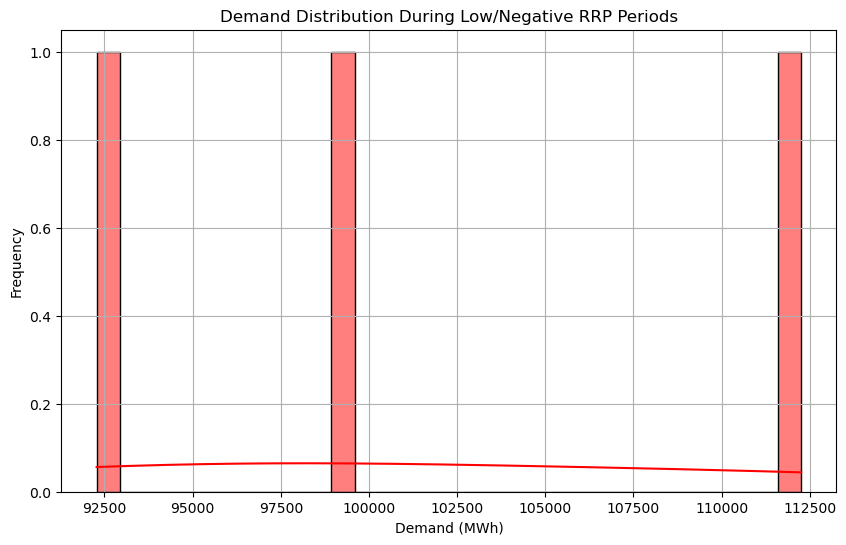

Percentage of periods with negative/low prices: 0.14%
Mean demand during these periods: 101372.56 MWh
Median demand during these periods: 99585.84 MWh


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
low_price_data = data[data['RRP'] <= 0]
plt.figure(figsize=(10, 6))
sns.histplot(low_price_data['demand'], bins=30, kde=True, color='red')
plt.title('Demand Distribution During Low/Negative RRP Periods')
plt.xlabel('Demand (MWh)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
mean_demand = low_price_data['demand'].mean()
median_demand = low_price_data['demand'].median()
negative_price_ratio = (len(low_price_data) / len(data)) * 100

print(f"Percentage of periods with negative/low prices: {negative_price_ratio:.2f}%")
print(f"Mean demand during these periods: {mean_demand:.2f} MWh")
print(f"Median demand during these periods: {median_demand:.2f} MWh")



# Negative or low RRP periods using demand and price 

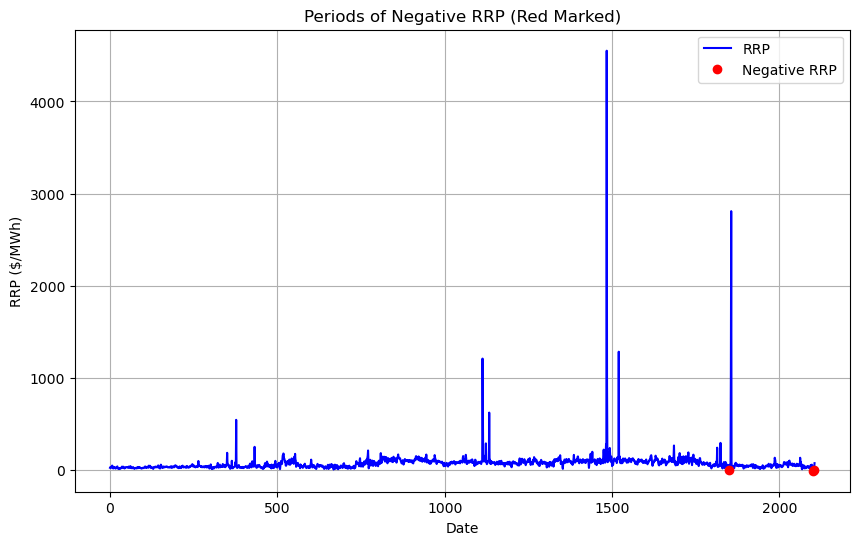

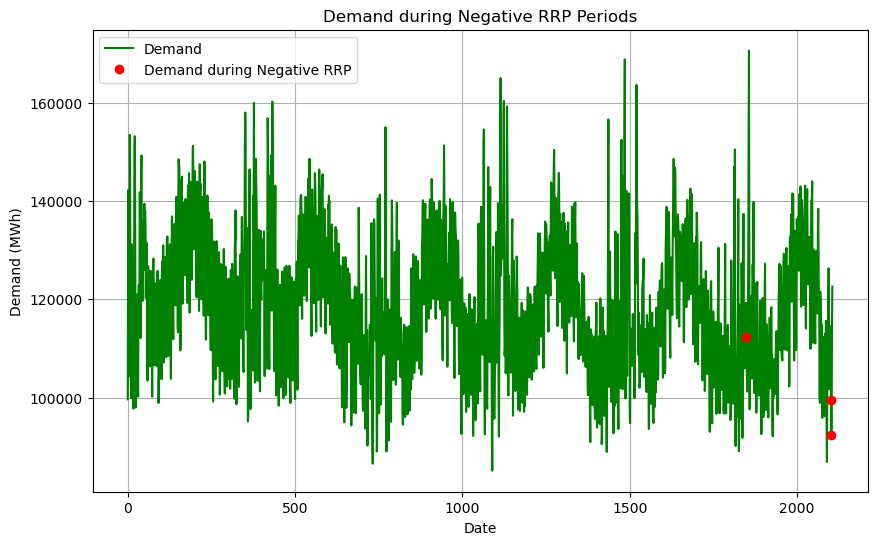

Correlation between RRP and Demand: 0.21753821701323334


In [27]:
import pandas as pd
import matplotlib.pyplot as plt

threshold = 0  
negative_price_periods = data[data['RRP'] < threshold]
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['RRP'], label='RRP', color='blue')
plt.plot(negative_price_periods.index, negative_price_periods['RRP'], 'ro', label='Negative RRP')
plt.title('Periods of Negative RRP (Red Marked)')
plt.xlabel('Date')
plt.ylabel('RRP ($/MWh)')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['demand'], label='Demand', color='green')
plt.plot(negative_price_periods.index, negative_price_periods['demand'], 'ro', label='Demand during Negative RRP')
plt.title('Demand during Negative RRP Periods')
plt.xlabel('Date')
plt.ylabel('Demand (MWh)')
plt.legend()
plt.grid(True)
plt.show()

correlation = data[['RRP', 'demand']].corr()
print(f"Correlation between RRP and Demand: {correlation.loc['RRP', 'demand']}")


In [31]:
# Calculate total energy consumed during negative RRP periods
negative_demand = negative_price_periods['demand'].sum()
negative_rrp = negative_price_periods['RRP'].sum()

# Estimate savings (example: using cost of negative RRP energy vs standard price)
savings = negative_demand * negative_rrp  # This is an example and may vary based on actual pricing models

print(f"Total Energy Consumed during Negative RRP Periods: {negative_demand} MWh")
print(f"Estimated Cost Savings: ${savings:.2f}")


Total Energy Consumed during Negative RRP Periods: 304117.69 MWh
Estimated Cost Savings: $-2986716.25


# Electricity Demand Distribution Across Seasons
This analysis visualizes how electricity demand varies by season (Winter, Spring, Summer, Autumn). Understanding seasonal demand trends is crucial for optimizing energy generation, grid management, and pricing strategies, as factors like temperature fluctuations and daylight hours significantly impact electricity consumption.

In [16]:
print(df.columns.tolist())

['date', 'demand', 'RRP', 'demand_pos_RRP', 'RRP_positive', 'demand_neg_RRP', 'RRP_negative', 'frac_at_neg_RRP', 'min_temperature', 'max_temperature', 'solar_exposure', 'rainfall', 'school_day', 'holiday', 'demand_pct_change', 'price_pct_change', 'price_elasticity']


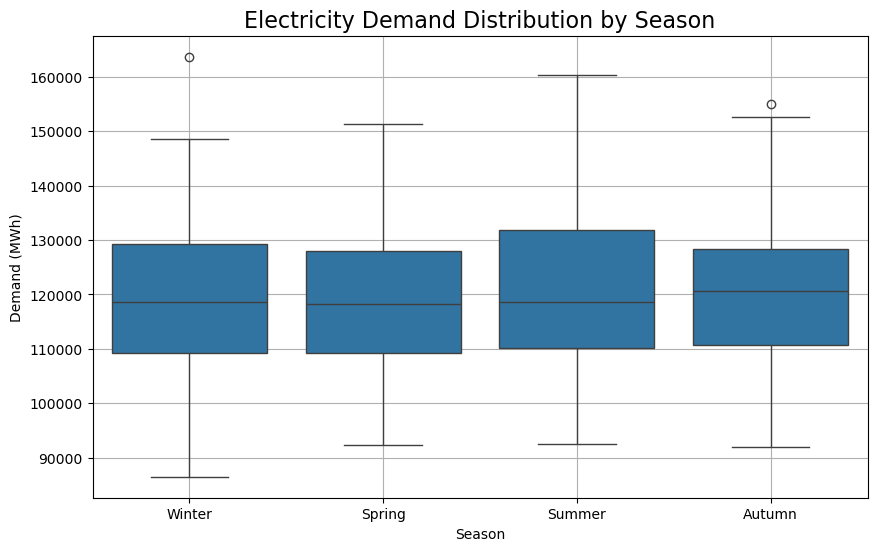

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
file_path = r"C:\Users\chint\OneDrive\Desktop\Electricity Demand and Price Forecasting\complete_dataset.csv"
data = pd.read_csv(file_path)
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data = data.dropna(subset=['date'])
data.set_index('date', inplace=True)


def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'
data['season'] = data.index.month.map(get_season)
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='demand', data=data, order=['Winter', 'Spring', 'Summer', 'Autumn'])
plt.title('Electricity Demand Distribution by Season', fontsize=16)
plt.ylabel('Demand (MWh)')
plt.xlabel('Season')
plt.grid(True)
plt.show()


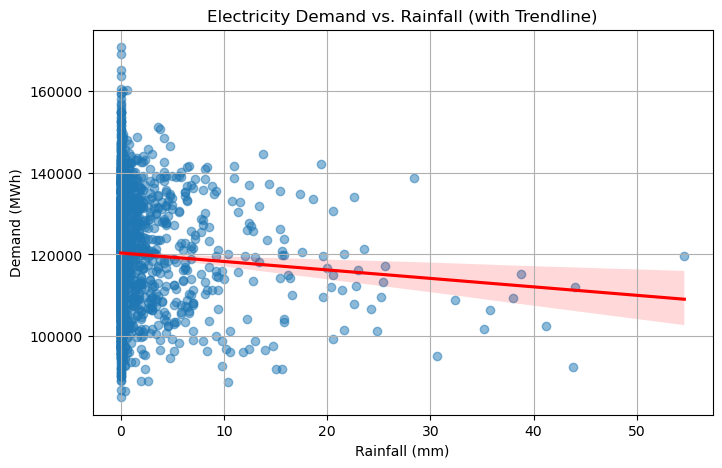

In [27]:
plt.figure(figsize=(8, 5))
sns.regplot(x=df["rainfall"], y=df["demand"], scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.title("Electricity Demand vs. Rainfall (with Trendline)")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Demand (MWh)")
plt.grid(True)
plt.show()

In [28]:
correlation = df["rainfall"].corr(df["demand"])
print(f"Correlation between rainfall and demand: {correlation:.2f}")


Correlation between rainfall and demand: -0.06


 # Electricity Demand Across Rainfall Categories
This visualization highlights how electricity demand varies based on different rainfall categories. Analyzing this relationship helps understand how weather conditions, such as rainfall intensity, influence electricity consumption patterns, aiding in better demand forecasting and grid management.

In [29]:
print(df.columns)


Index(['date', 'demand', 'RRP', 'demand_pos_RRP', 'RRP_positive',
       'demand_neg_RRP', 'RRP_negative', 'frac_at_neg_RRP', 'min_temperature',
       'max_temperature', 'solar_exposure', 'rainfall', 'school_day',
       'holiday', 'demand_pct_change', 'price_pct_change', 'price_elasticity'],
      dtype='object')


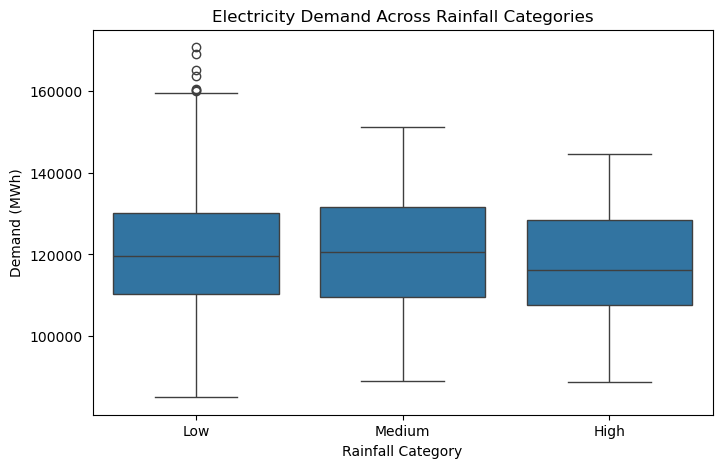

In [30]:
import pandas as pd
import numpy as np
bins = [0, 2, 5, np.inf]  
labels = ['Low', 'Medium', 'High']
df['rainfall_category'] = pd.cut(df['rainfall'], bins=bins, labels=labels, right=False)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='rainfall_category', y='demand', data=df)
plt.title("Electricity Demand Across Rainfall Categories")
plt.xlabel("Rainfall Category")
plt.ylabel("Demand (MWh)")
plt.show()


# Electricity Demand Analysis


In [11]:
import pandas as pd

# Load your dataset (adjust the file path accordingly)
data = pd.read_csv(r"C:\Users\chint\OneDrive\Desktop\Electricity Demand and Price Forecasting\complete_dataset.csv")

# Print the column names to check the correct column for 'date'
print(data.columns.tolist())


['date', 'demand', 'RRP', 'demand_pos_RRP', 'RRP_positive', 'demand_neg_RRP', 'RRP_negative', 'frac_at_neg_RRP', 'min_temperature', 'max_temperature', 'solar_exposure', 'rainfall', 'school_day', 'holiday']


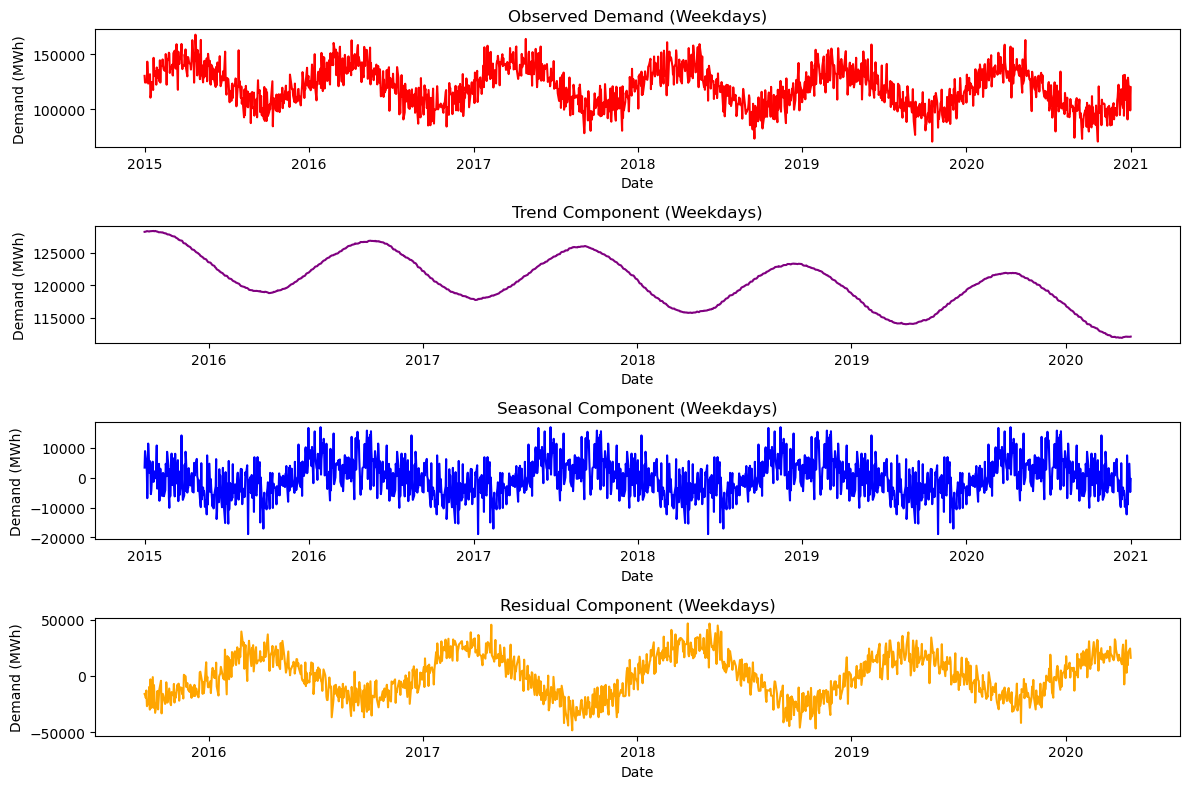

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


np.random.seed(42)
date_rng = pd.date_range(start='1/1/2015', end='12/31/2020', freq='D')  
trend = np.linspace(125000, 115000, len(date_rng))  
seasonality = 20000 * np.sin(2 * np.pi * date_rng.dayofyear / 365)  
noise = np.random.normal(0, 10000, len(date_rng))  
observed = trend + seasonality + noise
df = pd.DataFrame({'Date': date_rng, 'Observed': observed})
df.set_index('Date', inplace=True)
df_weekdays = df[df.index.weekday < 5]  
result_weekdays = seasonal_decompose(df_weekdays['Observed'], model='additive', period=365)
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(df_weekdays.index, df_weekdays['Observed'], label='Observed Demand', color='red')
plt.title('Observed Demand (Weekdays)')
plt.xlabel('Date')
plt.ylabel('Demand (MWh)')

plt.subplot(4, 1, 2)
plt.plot(df_weekdays.index, result_weekdays.trend, label='Trend Component', color='purple')
plt.title('Trend Component (Weekdays)')
plt.xlabel('Date')
plt.ylabel('Demand (MWh)')
plt.subplot(4, 1, 3)
plt.plot(df_weekdays.index, result_weekdays.seasonal, label='Seasonal Component', color='blue')
plt.title('Seasonal Component (Weekdays)')
plt.xlabel('Date')
plt.ylabel('Demand (MWh)')

plt.subplot(4, 1, 4)
plt.plot(df_weekdays.index, result_weekdays.resid, label='Residual Component', color='orange')
plt.title('Residual Component (Weekdays)')
plt.xlabel('Date')
plt.ylabel('Demand (MWh)')

plt.tight_layout()
plt.show()


# Time-Series Analysis: Trend, Seasonality & Residual Insights

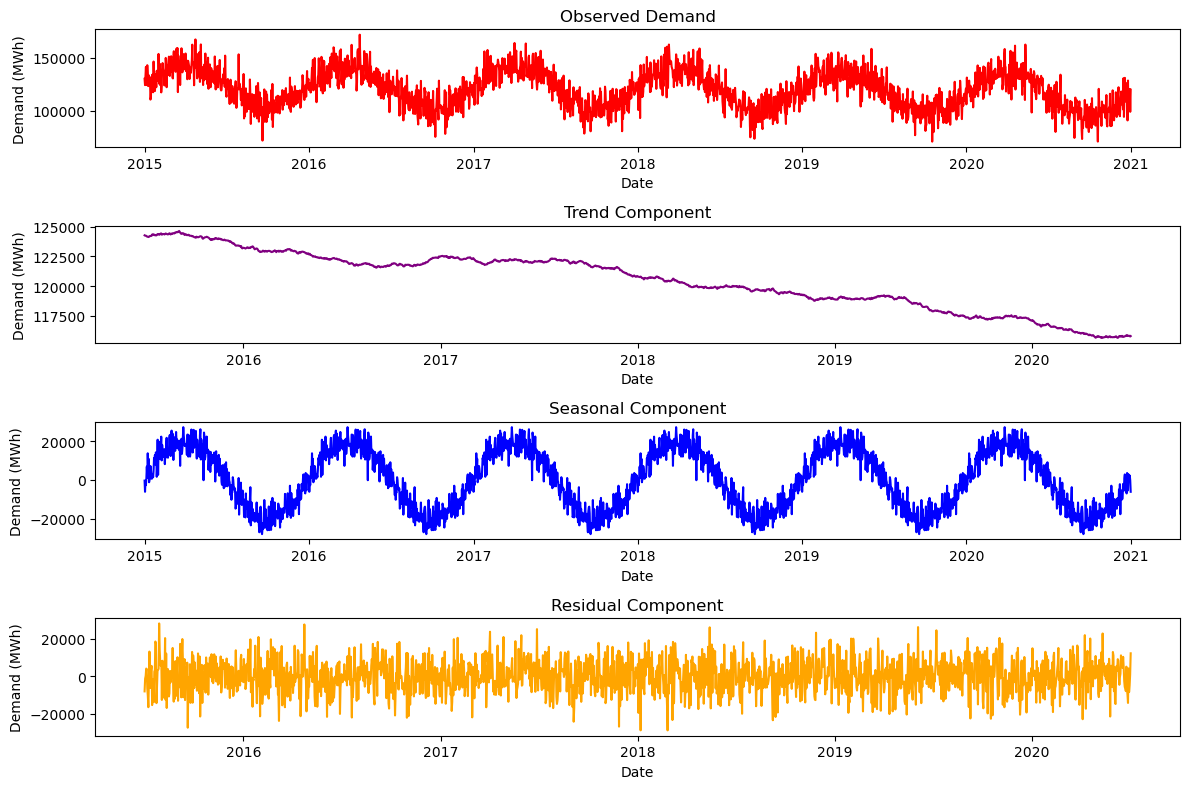

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
np.random.seed(42)
date_rng = pd.date_range(start='1/1/2015', end='12/31/2020', freq='D')  
trend = np.linspace(125000, 115000, len(date_rng))  # Linear trend
seasonality = 20000 * np.sin(2 * np.pi * date_rng.dayofyear / 365) 
noise = np.random.normal(0, 10000, len(date_rng))  
observed = trend + seasonality + noise
df = pd.DataFrame({'Date': date_rng, 'Observed': observed})
df.set_index('Date', inplace=True)
result = seasonal_decompose(df['Observed'], model='additive', period=365)
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(df.index, df['Observed'], label='Observed Demand', color='red')
plt.title('Observed Demand')
plt.xlabel('Date')
plt.ylabel('Demand (MWh)')
plt.subplot(4, 1, 2)
plt.plot(df.index, result.trend, label='Trend Component', color='purple')
plt.title('Trend Component')
plt.xlabel('Date')
plt.ylabel('Demand (MWh)')
plt.subplot(4, 1, 3)
plt.plot(df.index, result.seasonal, label='Seasonal Component', color='blue')
plt.title('Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Demand (MWh)')
plt.subplot(4, 1, 4)
plt.plot(df.index, result.resid, label='Residual Component', color='orange')
plt.title('Residual Component')
plt.xlabel('Date')
plt.ylabel('Demand (MWh)')
plt.tight_layout()
plt.show()


# Advanced Temporal Feature Analysis

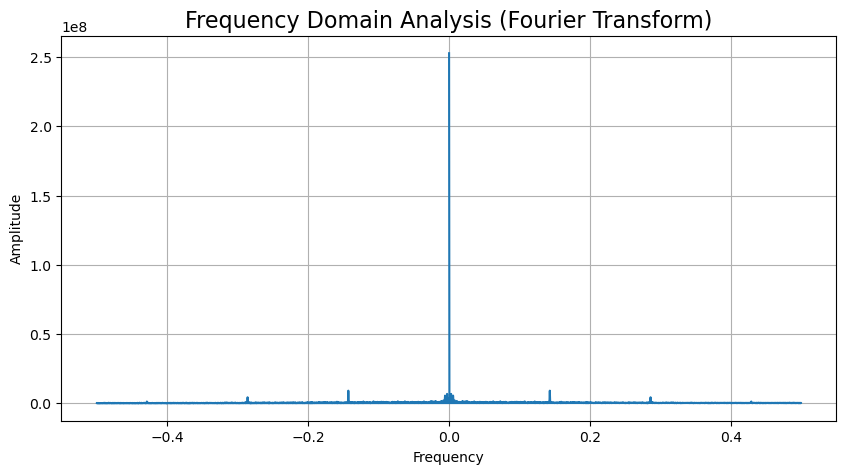

In [21]:
import numpy as np
demand_fft = np.fft.fft(data['demand'].fillna(0))
frequencies = np.fft.fftfreq(len(demand_fft))
plt.figure(figsize=(10, 5))
plt.plot(frequencies, np.abs(demand_fft))
plt.title('Frequency Domain Analysis (Fourier Transform)', fontsize=16)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


# Feature Engineering:
Lag Features: demand_lag_1, RRP_lag_1.
Rolling Statistics: 7-day mean and std of demand.
Temperature Difference: temp_diff.
Demand-Temperature Interaction: demand_temp_interaction.
Missing Values: Handled using ffill() (forward fill)

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\chint\OneDrive\Desktop\Electricity Demand and Price Forecasting\complete_dataset.csv")
df['date'] = pd.to_datetime(df['date'], dayfirst=True)  
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month
df['week_of_year'] = df['date'].dt.isocalendar().week
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
print(df.head())


        date      demand        RRP  demand_pos_RRP  RRP_positive  \
0 2015-01-01   99635.030  25.633696       97319.240     26.415953   
1 2015-01-02  129606.010  33.138988      121082.015     38.837661   
2 2015-01-03  142300.540  34.564855      142300.540     34.564855   
3 2015-01-04  104330.715  25.005560      104330.715     25.005560   
4 2015-01-05  118132.200  26.724176      118132.200     26.724176   

   demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
0        2315.790     -7.240000         0.020833             13.3   
1        8523.995    -47.809776         0.062500             15.4   
2           0.000      0.000000         0.000000             20.0   
3           0.000      0.000000         0.000000             16.3   
4           0.000      0.000000         0.000000             15.0   

   max_temperature  solar_exposure  rainfall school_day holiday  day_of_week  \
0             26.9            23.6       0.0          N       Y            3   
1         

In [71]:
import pandas as pd
df = pd.read_csv(r"C:\Users\chint\OneDrive\Desktop\Electricity Demand and Price Forecasting\complete_dataset.csv")
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month
df['week_of_year'] = df['date'].dt.isocalendar().week
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
df['temperature_diff'] = df['max_temperature'] - df['min_temperature']
df['demand_per_solar'] = df['demand'] / (df['solar_exposure'] + 1)  
df['price_demand_ratio'] = df['RRP'] / (df['demand'] + 1)

df['demand_lag_1'] = df['demand'].shift(1)
df['RRP_lag_1'] = df['RRP'].shift(1)

df['demand_rolling_mean_7'] = df['demand'].rolling(window=7).mean()
df['RRP_rolling_std_7'] = df['RRP'].rolling(window=7).std()
df = df.bfill()  
print(df.head())
df.to_csv(r"C:\Users\chint\OneDrive\Desktop\Electricity Demand and Price Forecasting\enhanced_dataset.csv", index=False)

print(" Feature engineering completed and saved successfully!")


        date      demand        RRP  demand_pos_RRP  RRP_positive  \
0 2015-01-01   99635.030  25.633696       97319.240     26.415953   
1 2015-01-02  129606.010  33.138988      121082.015     38.837661   
2 2015-01-03  142300.540  34.564855      142300.540     34.564855   
3 2015-01-04  104330.715  25.005560      104330.715     25.005560   
4 2015-01-05  118132.200  26.724176      118132.200     26.724176   

   demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
0        2315.790     -7.240000         0.020833             13.3   
1        8523.995    -47.809776         0.062500             15.4   
2           0.000      0.000000         0.000000             20.0   
3           0.000      0.000000         0.000000             16.3   
4           0.000      0.000000         0.000000             15.0   

   max_temperature  ...  month  week_of_year is_weekend temperature_diff  \
0             26.9  ...      1             1          0             13.6   
1             38.8

In [72]:

df['demand_lag_1'] = df['demand'].shift(1)
df['RRP_lag_1'] = df['RRP'].shift(1)
df['demand_rolling_mean_7'] = df['demand'].rolling(window=7).mean()
df['demand_rolling_std_7'] = df['demand'].rolling(window=7).std()
df['temp_diff'] = df['max_temperature'] - df['min_temperature']
df['demand_temp_interaction'] = df['demand'] * df['temp_diff']
df['school_day'] = df['school_day'].map({'Y': 1, 'N': 0})
df['holiday'] = df['holiday'].map({'Y': 1, 'N': 0})
df = df.bfill()
print(df.head())


        date      demand        RRP  demand_pos_RRP  RRP_positive  \
0 2015-01-01   99635.030  25.633696       97319.240     26.415953   
1 2015-01-02  129606.010  33.138988      121082.015     38.837661   
2 2015-01-03  142300.540  34.564855      142300.540     34.564855   
3 2015-01-04  104330.715  25.005560      104330.715     25.005560   
4 2015-01-05  118132.200  26.724176      118132.200     26.724176   

   demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
0        2315.790     -7.240000         0.020833             13.3   
1        8523.995    -47.809776         0.062500             15.4   
2           0.000      0.000000         0.000000             20.0   
3           0.000      0.000000         0.000000             16.3   
4           0.000      0.000000         0.000000             15.0   

   max_temperature  ...  temperature_diff  demand_per_solar  \
0             26.9  ...              13.6       4050.204472   
1             38.8  ...              23.4   

In [6]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import pandas as pd
df = pd.read_csv(r"C:\Users\chint\OneDrive\Desktop\Electricity Demand and Price Forecasting\complete_dataset.csv")
label_encoder = LabelEncoder()
df['school_day'] = label_encoder.fit_transform(df['school_day'])
df['holiday'] = label_encoder.fit_transform(df['holiday'])
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month
df['week_of_year'] = df['date'].dt.isocalendar().week
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
df['demand_lag_1'] = df['demand'].shift(1)
df['RRP_lag_1'] = df['RRP'].shift(1)
df['demand_rolling_mean_7'] = df['demand'].rolling(window=7).mean()
df['demand_rolling_std_7'] = df['demand'].rolling(window=7).std()
df['temp_diff'] = df['max_temperature'] - df['min_temperature']
df['demand_temp_interaction'] = df['demand'] * df['temp_diff']
df.ffill(inplace=True)
features = ['demand', 'RRP', 'demand_lag_1', 'RRP_lag_1',
            'demand_rolling_mean_7', 'demand_rolling_std_7',
            'temp_diff', 'demand_temp_interaction',
            'min_temperature', 'max_temperature',
            'solar_exposure', 'rainfall', 'school_day',
            'holiday', 'day_of_week', 'month', 'week_of_year', 'is_weekend']

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[features])

# Convert back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=features)

print(df_scaled.head())


     demand       RRP  demand_lag_1  RRP_lag_1  demand_rolling_mean_7  \
0  0.169948  0.006960           NaN        NaN                    NaN   
1  0.520242  0.008608      0.169948   0.006960                    NaN   
2  0.668613  0.008921      0.520242   0.008608                    NaN   
3  0.224830  0.006823      0.668613   0.008921                    NaN   
4  0.386139  0.007200      0.224830   0.006823                    NaN   

   demand_rolling_std_7  temp_diff  demand_temp_interaction  min_temperature  \
0                   NaN   0.448980                 0.295221         0.463504   
1                   NaN   0.782313                 0.672821         0.540146   
2                   NaN   0.605442                 0.573138         0.708029   
3                   NaN   0.159864                 0.110004         0.572993   
4                   NaN   0.224490                 0.176362         0.525547   

   max_temperature  solar_exposure  rainfall  school_day  holiday  \
0         0

# Autocorrelation and Partial Autocorrelation Plots:
# Autocorrelation of Electricity Demand
The Autocorrelation Function (ACF) plot illustrates the correlation of electricity demand with its own past values over a range of lags. It helps identify repeating patterns, periodic trends, and whether the demand is influenced by its previous values. A significant peak at certain lags suggests the presence of patterns at those intervals.

# Partial Autocorrelation of Electricity Demand
The Partial Autocorrelation Function (PACF) plot shows the correlation of electricity demand with its past values, while controlling for the correlations at shorter lags. It helps determine the number of significant lags to include in time series models like ARIMA. The PACF plot is useful in identifying the order of the autoregressive (AR) component.

<Figure size 1200x500 with 0 Axes>

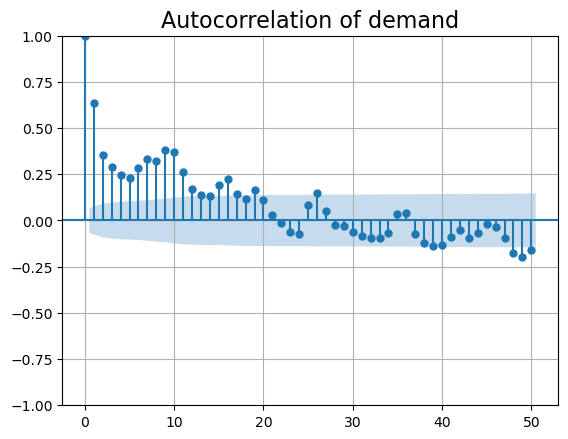

<Figure size 1200x500 with 0 Axes>

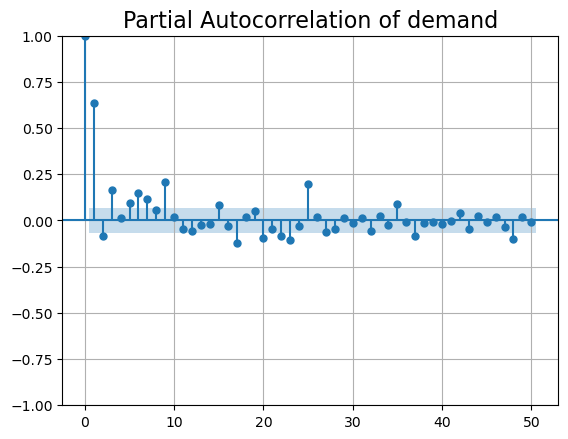

<Figure size 1200x500 with 0 Axes>

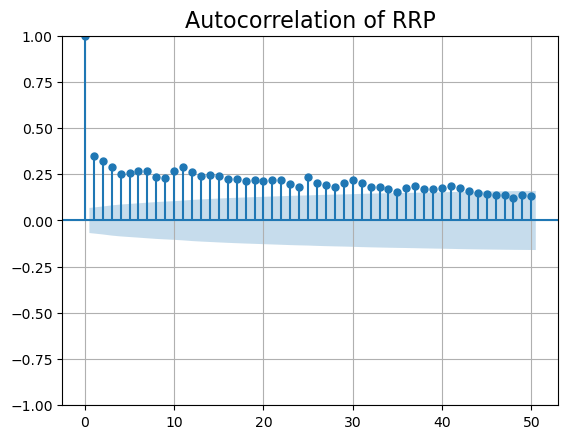

<Figure size 1200x500 with 0 Axes>

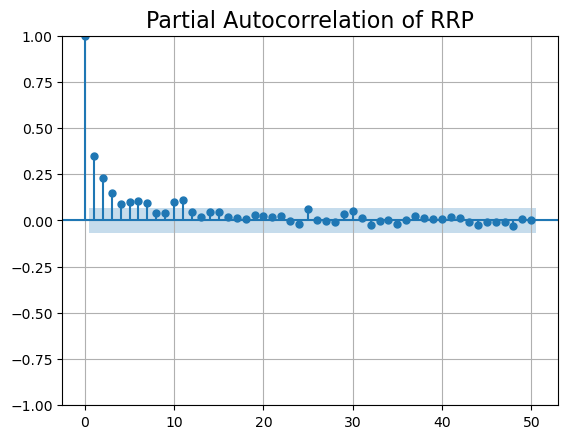

<Figure size 1200x500 with 0 Axes>

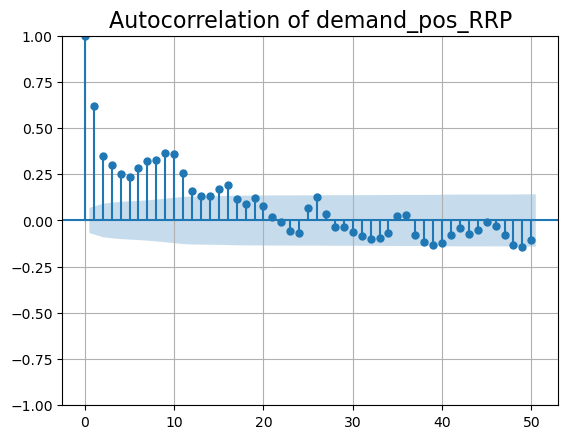

<Figure size 1200x500 with 0 Axes>

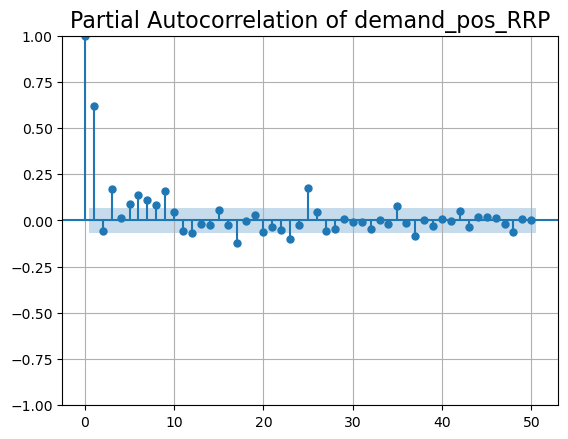

<Figure size 1200x500 with 0 Axes>

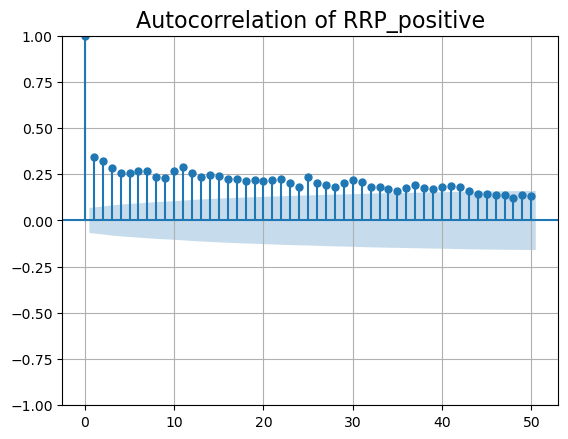

<Figure size 1200x500 with 0 Axes>

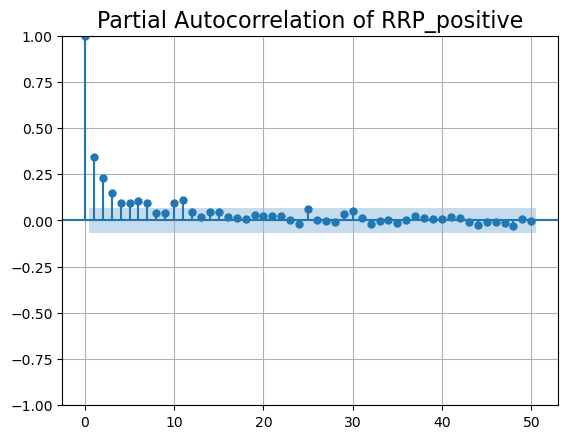

<Figure size 1200x500 with 0 Axes>

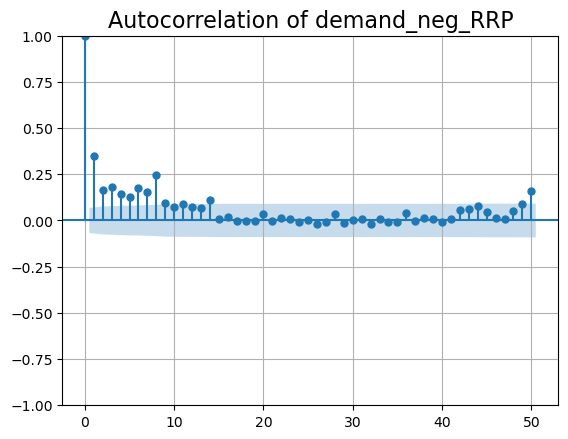

<Figure size 1200x500 with 0 Axes>

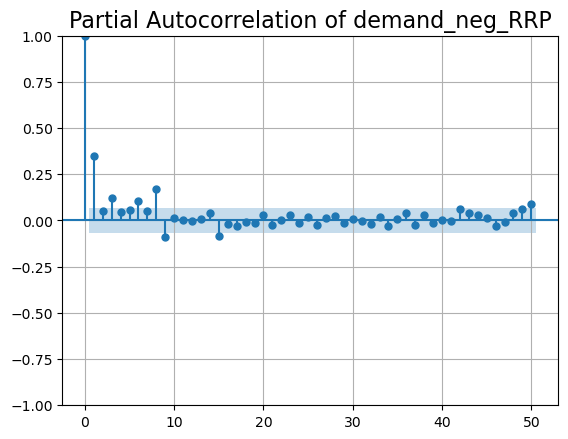

<Figure size 1200x500 with 0 Axes>

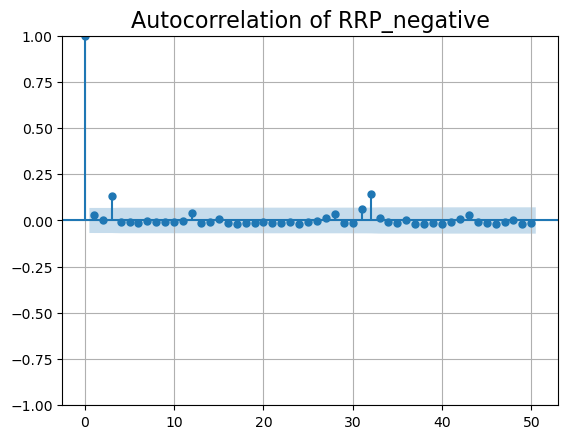

<Figure size 1200x500 with 0 Axes>

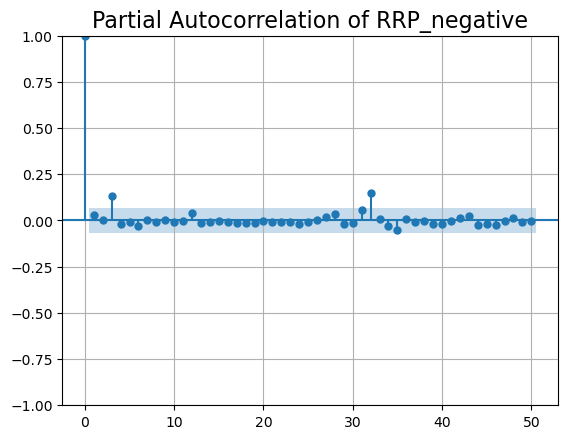

<Figure size 1200x500 with 0 Axes>

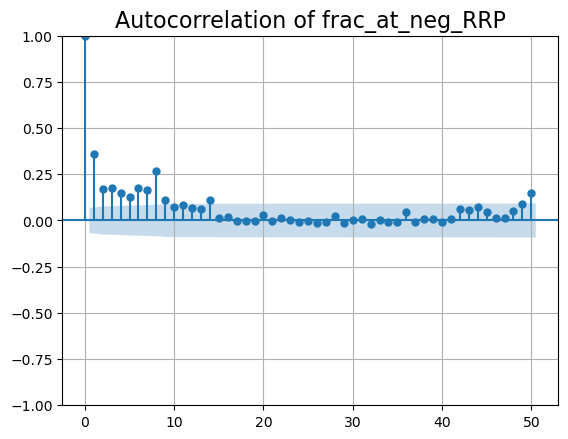

<Figure size 1200x500 with 0 Axes>

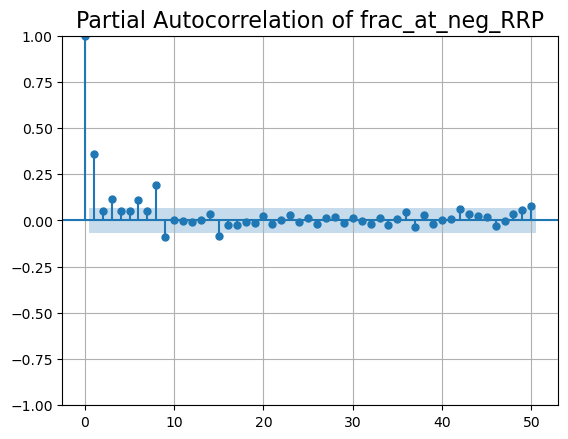

<Figure size 1200x500 with 0 Axes>

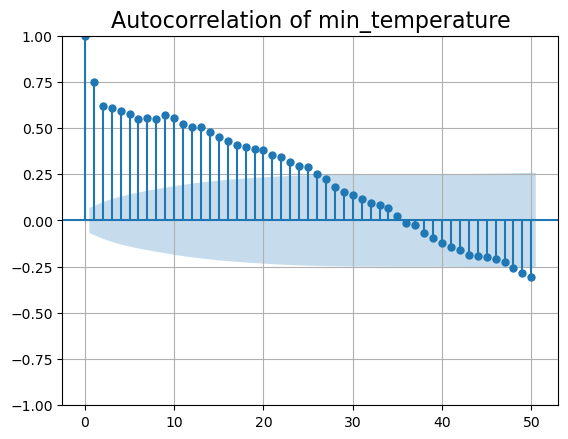

<Figure size 1200x500 with 0 Axes>

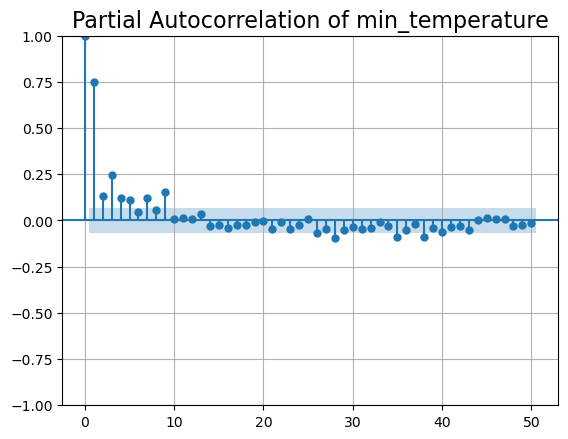

<Figure size 1200x500 with 0 Axes>

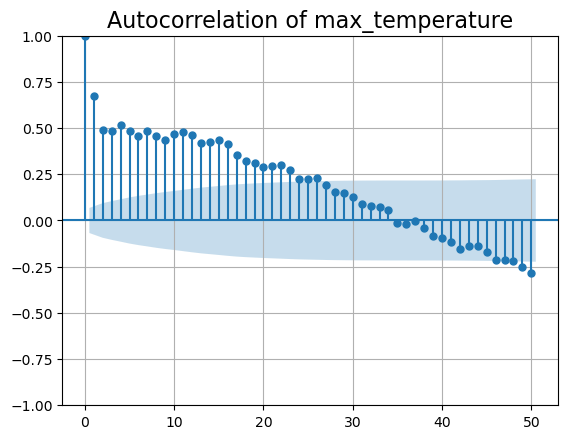

<Figure size 1200x500 with 0 Axes>

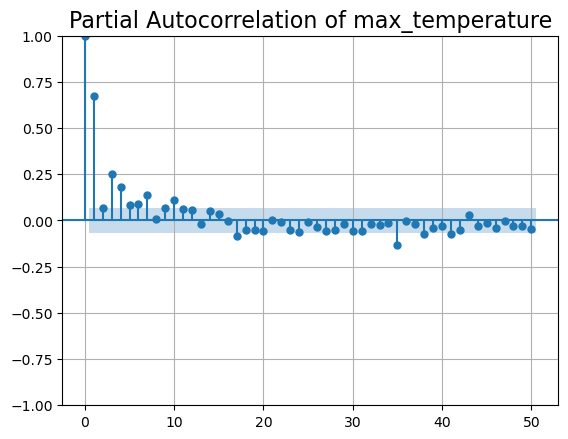

<Figure size 1200x500 with 0 Axes>

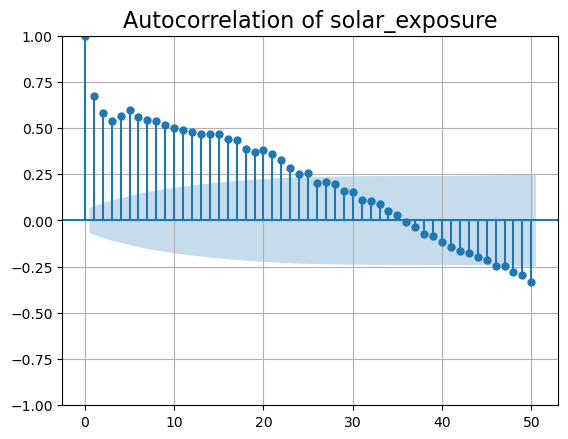

<Figure size 1200x500 with 0 Axes>

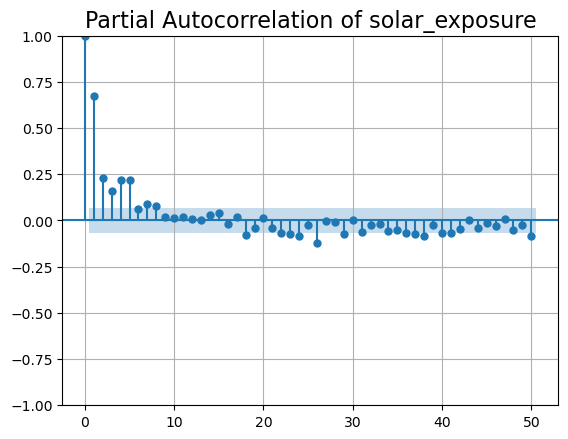

<Figure size 1200x500 with 0 Axes>

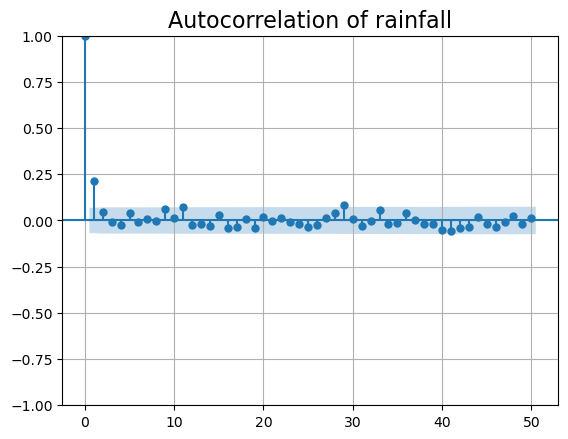

<Figure size 1200x500 with 0 Axes>

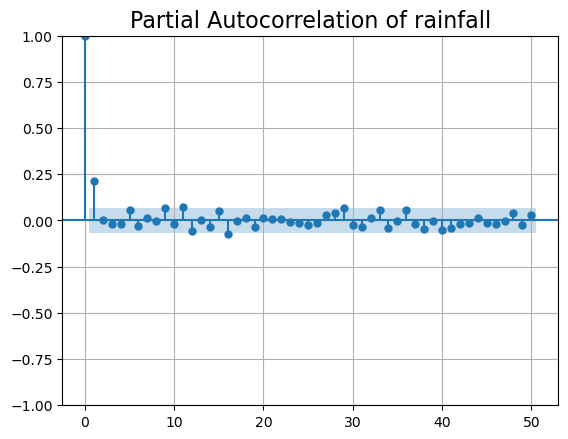

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


columns_to_analyze = ['demand', 'RRP', 'demand_pos_RRP', 'RRP_positive', 
                      'demand_neg_RRP', 'RRP_negative', 'frac_at_neg_RRP', 
                      'min_temperature', 'max_temperature', 'solar_exposure', 
                      'rainfall']


for column in columns_to_analyze:
    
    series = data[column].dropna()
    
    if len(series) > 1: 
        plt.figure(figsize=(12, 5))
        plot_acf(series, lags=50)
        plt.title(f'Autocorrelation of {column}', fontsize=16)
        plt.grid(True)
        plt.show()
        plt.figure(figsize=(12, 5))
        plot_pacf(series, lags=50)
        plt.title(f'Partial Autocorrelation of {column}', fontsize=16)
        plt.grid(True)
        plt.show()
    else:
        print(f"Not enough data for {column} to plot ACF and PACF.")


# Electricity Demand and Price Forecasting: EDA Report

# 1. Introduction
This report outlines the Exploratory Data Analysis (EDA) for the electricity demand and price forecasting project. The objective is to understand the dataset, clean the data, detect anomalies, and analyze trends that will aid in forecasting electricity demand and prices.

# 2. Dataset Overview
The dataset contains features such as demand, RRP (Regional Reference Price), temperature, solar exposure, rainfall, and categorical variables like school day and holiday. The initial inspection reveals a mixture of numerical and categorical features.

# 3. Data Cleaning and Preprocessing
Missing Values: Missing data was identified and handled through imputation or removal based on the proportion of missing values per feature.
Anomaly Detection & Outlier Analysis: Outliers in demand and price data were capped at 3 standard deviations to minimize their impact on forecasting accuracy.
Categorical Encoding: Categorical features (school day, holiday) were encoded into numerical format using one-hot encoding for compatibility with machine learning models.
# 4. Exploratory Data Analysis (EDA)

Demand Distribution: Demand data exhibited variations across time, with noticeable peaks during certain periods. Outlier capping helped normalize the distribution, making it more suitable for forecasting.
Trends & Correlations: Seasonal trends were detected in demand, and correlations were observed between demand and factors such as temperature, solar exposure, and RRP.
Impact of Categorical Features: School days and holidays influenced demand patterns, indicating that these variables should be included in the forecasting model.
# 5. Key Insights

Capping outliers significantly improved the data distribution, which is crucial for building more accurate forecasting models.
Seasonal trends and the impact of external factors (e.g., weather, holidays) were evident and should be considered in future feature engineering and model development.
# 6. Conclusion

The EDA has provided critical insights into the dataset’s structure and highlighted the importance of handling outliers, encoding categorical variables, and understanding seasonal patterns. These insights lay the groundwork for the next steps, which include feature engineering and the development of time-series forecasting models.